# PHASE 2: Molecule Building using fragment library 

"""
PHASE 2: Designing new druggable hypertension molecules 

Created on Monday Apr 24 2023 
Updated on Monday June 5 2023
Updated on Monday July 17 2023 - Updated the list of fragments in the fragment library.

@author: Odifentse M Lehasa

The purpose of this notebook is to conduct computational fragment-based drug discovery using Python. 

In phase 1, we collected exisiting molecules, fragmented them, and create a fragment library.

In this phase, we will use that fragment library to build new molecules. 


"""

## STEP 0: IMPORT LIBRARIES 

In [4]:
# import libraries

from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import BRICS
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Lipinski
import pandas as pd  


## STEP 1: IMPORT FRAGMENT LIBRARY 

In [5]:
# Use fragments from Fragment Library 

df_frags = pd.read_csv('/Users/odilehasa/Hypertension/Final_Experiments/FINAL - October/Output/1. Fragment_library.csv', index_col=0)
df_frags

,Fragment,Molecular Weight,LogP,Hydrogen Donors,Hydrogen Acceptors,Ro3 Pass,Frequency
6,[3*]O[3*],15.999,-0.06840,0,1,1,17
10,[6*]C(=O)O,45.017,0.21370,1,1,1,16
12,[5*]N[5*],15.015,-0.49540,1,1,1,14
9,[4*]CC,29.062,0.97390,0,0,1,13
13,[16*]c1ccccc1,77.106,0.86120,0,0,1,12
...,...,...,...,...,...,...,...
39,[4*][C@H](C(=O)O)C(C)C,101.125,1.06480,1,1,1,1
40,[5*]N([5*])[5*],14.007,-0.31870,0,1,1,1
41,[5*]N1Cc2cc([16*])c([16*])cc2C[C@H]1[13*],129.162,-0.26640,0,1,1,1
42,[1*]C(=O)[C@@H]([4*])CCC,84.118,1.20020,0,1,1,1


### View fragments from the library as a set

In [7]:
allfrags = set(x for x in df_frags['Fragment'])

allfrags

{'[1*]C(=O)CC',
 '[1*]C(=O)CCCC',
 '[1*]C(=O)C[7*]',
 '[1*]C(=O)C[P@@](=O)(CCCC[8*])O[3*]',
 '[1*]C(=O)[C@@H](C[C@H](O)[C@@H](N)C[C@H](C[8*])C(C)C)C(C)C',
 '[1*]C(=O)[C@@H]([4*])C',
 '[1*]C(=O)[C@@H]([4*])CCC',
 '[1*]C(=O)[C@@H]([4*])CCCCN',
 '[1*]C(=O)[C@@H]([4*])CC[8*]',
 '[1*]C(=O)[C@H](C)CS',
 '[1*]C([1*])=O',
 '[1*]C([6*])=O',
 '[10*]N1C(=O)C2(CCCC2)N=C1CCCC',
 '[10*]N1C(=O)N(C)C[C@H]1[13*]',
 '[12*]S(=O)(=O)c1ccccc1[16*]',
 '[13*][C@@H]1CCCN2CCC[C@H]([15*])C(=O)N12',
 '[14*]c1cccs1',
 '[14*]c1nc2ccccc2n1C',
 '[14*]c1nn[nH]n1',
 '[14*]c1nnn[nH]1',
 '[14*]c1noc(=O)[nH]1',
 '[14*]c1noc(C)c1C',
 '[14*]c1oc(=O)oc1C',
 '[15*]C1CCCCC1',
 '[15*][C@H]1CCc2ccccc2N(CC(=O)O)C1=O',
 '[16*]c1cc([16*])c([16*])c([16*])c1',
 '[16*]c1ccc([16*])c([16*])c1',
 '[16*]c1ccc([16*])cc1',
 '[16*]c1ccccc1',
 '[16*]c1ccccc1[16*]',
 '[3*]OC',
 '[3*]O[3*]',
 '[4*]C([4*])C',
 '[4*]C([4*])C(C)C',
 '[4*]CC',
 '[4*]CC(C)(C)C(N)=O',
 '[4*]CCC[4*]',
 '[4*]C[8*]',
 '[4*][C@@H](CC[8*])C(=O)O',
 '[4*][C@H](C(=O)O)C(C)

In [8]:
# total number of unique fragments created and stored in the set

len(allfrags)

63

## STEP 2: BUILD MOLECULES - USING FRAGMENTS

In [9]:
# Use the seed() method to initialize the random number generator

import random    
random.seed(0)

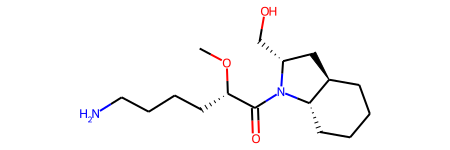

In [10]:
# read the fragments from the set of fragments as molecule objects from SMILES

fragms = [Chem.MolFromSmiles(x) for x in allfrags]


# build a molecule using the fragments in the list - using BRICKSBuild 

ms = BRICS.BRICSBuild(fragms) 

# randomly generate 1 molecule using the fragments 

next(ms)

### Randomly generate 10,00 new molecules using the fragments from the list


In [11]:
new_mols = [next(ms) for x in range(10000)]  #this may take approximately 15 minutes.

new_mols

 ...]

### Transform new molecules to SMILES format and save this as a dataframe


In [13]:
# smiles format of new molecules 
smi = [Chem.MolToSmiles(x) for x in new_mols]
smi


# save as dataframe

smi_df = pd.DataFrame(smi) 
    
# Save the new molecules dataframe as a CSV file

smi_df.to_csv('2. C09_new mols (10,000).csv') 
smi_df

,0
0,NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...
1,NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...
2,CO[C@@H]1C[C@H]2CCCC[C@@H]2N1[C@@H](CCCCN)C(=O...
3,NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...
4,NCCCC[C@@H](C(=O)N1[C@H](CO)C[C@H]2CCCC[C@@H]2...
...,...
9995,CCCCC1=NC2(CCCC2)C(=O)N1[C@@H]1CC2(CN1[C@@H](C...
9996,CO[C@@H]1CC2(CN1[C@@H](CCCCN)C(=O)N1[C@H](c3no...
9997,NCCCC[C@@H](C(=O)N1[C@H](c2noc(=O)[nH]2)C[C@@H...
9998,NCCCC[C@@H](C(=O)N1[C@H](c2noc(=O)[nH]2)C[C@@H...


## STEP 3: VIEW IMAGES OF NEW MOLECULES


/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:252: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


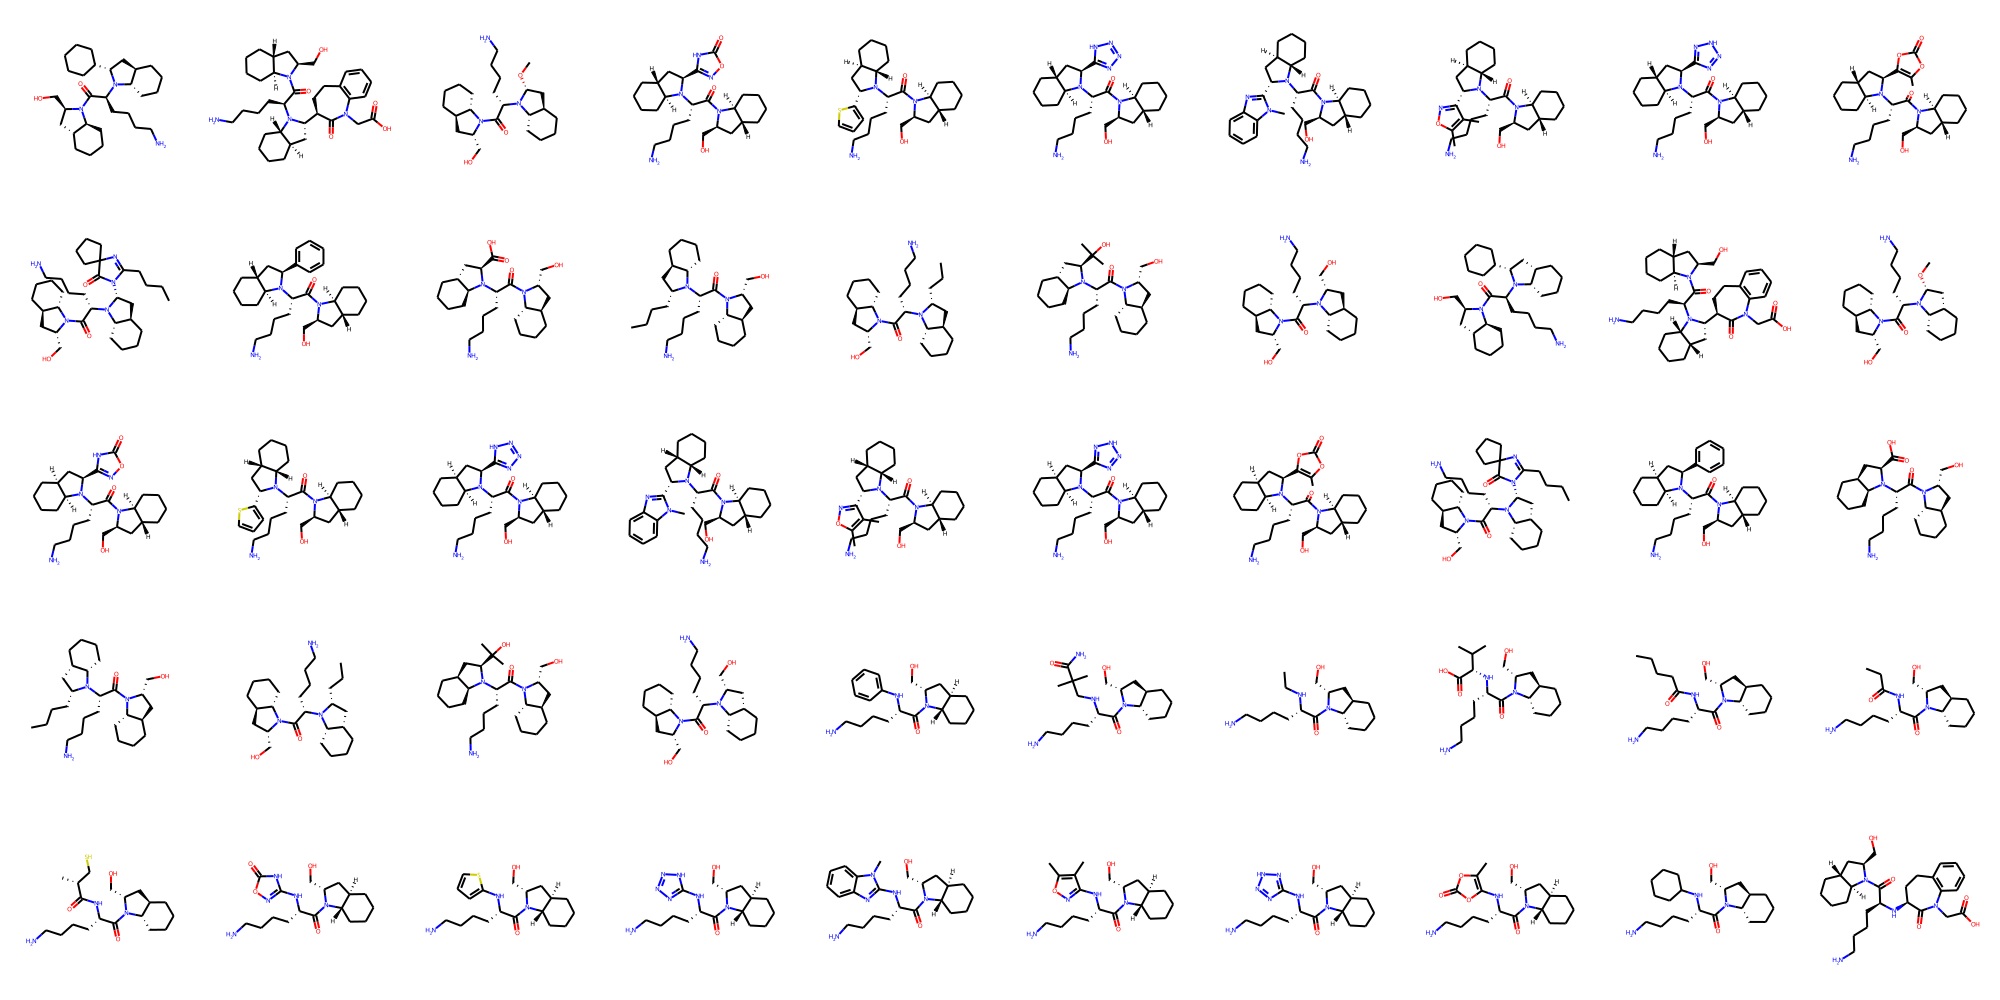

In [14]:
# view the images of the newly created molecules 
img = Draw.MolsToImage(new_mols, molsPerRow=10) 

img = Draw.MolsToGridImage(new_mols, molsPerRow=10, subImgSize=(200,200), returnPNG=False)

img

## STEP 4: SAVE THE IMAGES OF THE NEW MOLECULES AS A PNG FILE

In [16]:

save_mols = img.save('2.1 C09_new_mols_(10,000 snippet).png')

# --- END HERE --- 
